In [52]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import itertools
sb.set() # set the default Seaborn style for graphics

In [53]:
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools

# Activate inline plotting in notebook
py.init_notebook_mode(connected = False)

In [54]:
athdata = pd.read_csv('athlete_events.csv')
athdata.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [55]:
athdata.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

In [56]:
athdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [57]:
print(athdata.isnull().sum()) #print missing values

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [58]:
athdata['Medal'].fillna('Lose',inplace=True ) #replace NaN to LOSE

# Drop rows with any NaN in the selected columns only
athdata = athdata.dropna(subset = athdata.columns[[3,4,5]], how='any')
print(athdata.isnull().sum()) #print missing values

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


In [59]:
print(athdata.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

USA    30
GBR    22
AUS    21
FRA    20
ITA    20
Name: NOC, dtype: int64


In [60]:
regions = pd.read_csv('noc_regions.csv')
regions.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [61]:
regions.drop('notes',axis = 1,inplace = True ) #remove notes
regions.rename(columns = {'region':'Country'},inplace = True) #rename region to country
regions.head()

NOC      Country
0  AFG  Afghanistan
1  AHO      Curacao
2  ALB      Albania
3  ALG      Algeria
4  AND      Andorra

In [62]:
#merge athdata and regions
merge = pd.merge(athdata, regions, on='NOC', how='left')
merge.dropna(inplace=True)
merge.head(50)

ID                            Name Sex   Age  Height  Weight  \
0    1                       A Dijiang   M  24.0   180.0    80.0   
1    2                        A Lamusi   M  23.0   170.0    60.0   
2    5        Christine Jacoba Aaftink   F  21.0   185.0    82.0   
3    5        Christine Jacoba Aaftink   F  21.0   185.0    82.0   
4    5        Christine Jacoba Aaftink   F  25.0   185.0    82.0   
5    5        Christine Jacoba Aaftink   F  25.0   185.0    82.0   
6    5        Christine Jacoba Aaftink   F  27.0   185.0    82.0   
7    5        Christine Jacoba Aaftink   F  27.0   185.0    82.0   
8    6                 Per Knut Aaland   M  31.0   188.0    75.0   
9    6                 Per Knut Aaland   M  31.0   188.0    75.0   
10   6                 Per Knut Aaland   M  31.0   188.0    75.0   
11   6                 Per Knut Aaland   M  31.0   188.0    75.0   
12   6                 Per Knut Aaland   M  33.0   188.0    75.0   
13   6                 Per Knut Aaland   M  33.0   188.0    75.0   
14   6                 Per Knut Aaland   M  33.0   188.0    75.0   
15   6                 Per Knut Aaland   M  33.0   188.0    75.0   
16   7                    John Aalberg   M  31.0   183.0    72.0   
17   7                    John Aalberg   M  31.0   183.0    72.0   
18   7                    John Aalberg   M  31.0   183.0    72.0   
19   7                    John Aalberg   M  31.0   183.0    72.0   
20   7                    John Aalberg   M  33.0   183.0    72.0   
21   7                    John Aalberg   M  33.0   183.0    72.0   
22   7                    John Aalberg   M  33.0   183.0    72.0   
23   7                    John Aalberg   M  33.0   183.0    72.0   
24   9                Antti Sami Aalto   M  26.0   186.0    96.0   
25  11              Jorma Ilmari Aalto   M  22.0   182.0    76.5   
26  12               Jyri Tapani Aalto   M  31.0   172.0    70.0   
27  13              Minna Maarit Aalto   F  30.0   159.0    55.5   
28  13              Minna Maarit Aalto   F  34.0   159.0    55.5   
29  14  Pirjo Hannele Aalto (Mattila-)   F  32.0   171.0    65.0   
30  16        Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0   
31  17         Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
32  17         Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
33  17         Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
34  17         Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
35  17         Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
36  17         Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
37  17         Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
38  17         Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
39  17         Paavo Johannes Aaltonen   M  32.0   175.0    64.0   
40  17         Paavo Johannes Aaltonen   M  32.0   175.0    64.0   
41  17         Paavo Johannes Aaltonen   M  32.0   175.0    64.0   
42  17         Paavo Johannes Aaltonen   M  32.0   175.0    64.0   
43  17         Paavo Johannes Aaltonen   M  32.0   175.0    64.0   
44  17         Paavo Johannes Aaltonen   M  32.0   175.0    64.0   
45  17         Paavo Johannes Aaltonen   M  32.0   175.0    64.0   
46  17         Paavo Johannes Aaltonen   M  32.0   175.0    64.0   
47  18            Timo Antero Aaltonen   M  31.0   189.0   130.0   
48  20              Kjetil Andr Aamodt   M  20.0   176.0    85.0   
49  20              Kjetil Andr Aamodt   M  20.0   176.0    85.0   

             Team  NOC        Games  Year  Season            City  \
0           China  CHN  1992 Summer  1992  Summer       Barcelona   
1           China  CHN  2012 Summer  2012  Summer          London   
2     Netherlands  NED  1988 Winter  1988  Winter         Calgary   
3     Netherlands  NED  1988 Winter  1988  Winter         Calgary   
4     Netherlands  NED  1992 Winter  1992  Winter     Albertville   
5     Netherlands  NED  1992 Winter  1992  Winter     Albertville   
6     Netherlands  NED  1994 Winter  1994  Winter   

In [63]:
summer = merge[merge.Season == 'Summer']
winter = merge[merge.Season == 'Winter']

In [64]:
country = winter.groupby('Sport')['Country'].nunique()
print(country)

Sport
Alpine Skiing                88
Biathlon                     45
Bobsleigh                    45
Cross Country Skiing         67
Curling                      15
Figure Skating               46
Freestyle Skiing             39
Ice Hockey                   27
Luge                         42
Nordic Combined              21
Short Track Speed Skating    32
Skeleton                     28
Ski Jumping                  30
Snowboarding                 35
Speed Skating                33
Name: Country, dtype: int64


In [65]:
#Number of Countries participated in the event
country = summer.groupby('Sport')['Country'].nunique()
print(country)

Sport
Archery                   89
Art Competitions           7
Athletics                203
Badminton                 62
Baseball                  15
Basketball                51
Beach Volleyball          39
Boxing                   156
Canoeing                  86
Cycling                  126
Diving                    63
Equestrianism             67
Fencing                   82
Figure Skating             1
Football                  75
Golf                      40
Gymnastics                82
Handball                  38
Hockey                    35
Ice Hockey                 2
Judo                     161
Lacrosse                   1
Modern Pentathlon         50
Motorboating               1
Rhythmic Gymnastics       41
Rowing                    86
Rugby                      3
Rugby Sevens              14
Sailing                  104
Shooting                 129
Softball                  12
Swimming                 181
Synchronized Swimming     39
Table Tennis              84
Taekwond

## Alpine Skiing

In [66]:
# dropping ALL duplicte names
namedata = pd.DataFrame(merge[["Name","Sport"]])
namedata.drop_duplicates(subset ="Name", keep = "first", inplace = True)  


In [67]:
#Pariticipating Athletes with data available
sport = namedata.Sport.value_counts().reset_index(name ='Athlete')
sport = sport.rename(columns = {"index" : "Sport"})                   
sport[sport.Sport == "Alpine Skiing"]

Sport  Athlete
19  Alpine Skiing     1748

In [68]:
AS = winter.loc[winter['Sport'] == 'Alpine Skiing']
AS

ID                Name Sex   Age  Height  Weight     Team  NOC  \
48          20  Kjetil Andr Aamodt   M  20.0   176.0    85.0   Norway  NOR   
49          20  Kjetil Andr Aamodt   M  20.0   176.0    85.0   Norway  NOR   
50          20  Kjetil Andr Aamodt   M  20.0   176.0    85.0   Norway  NOR   
51          20  Kjetil Andr Aamodt   M  20.0   176.0    85.0   Norway  NOR   
52          20  Kjetil Andr Aamodt   M  22.0   176.0    85.0   Norway  NOR   
...        ...                 ...  ..   ...     ...     ...      ...  ...   
206032  135500  Kristaps Zvejnieks   M  17.0   185.0    87.0   Latvia  LAT   
206033  135500  Kristaps Zvejnieks   M  21.0   185.0    87.0   Latvia  LAT   
206034  135500  Kristaps Zvejnieks   M  21.0   185.0    87.0   Latvia  LAT   
206092  135540      David Zwilling   M  22.0   174.0    68.0  Austria  AUT   
206093  135540      David Zwilling   M  22.0   174.0    68.0  Austria  AUT   

              Games  Year  Season         City          Sport  \
48      1992 Winter  1992  Winter  Albertville  Alpine Skiing   
49      1992 Winter  1992  Winter  Albertville  Alpine Skiing   
50      1992 Winter  1992  Winter  Albertville  Alpine Skiing   
51      1992 Winter  1992  Winter  Albertville  Alpine Skiing   
52      1994 Winter  1994  Winter  Lillehammer  Alpine Skiing   
...             ...   ...     ...          ...            ...   
206032  2010 Winter  2010  Winter    Vancouver  Alpine Skiing   
206033  2014 Winter  2014  Winter        Sochi  Alpine Skiing   
206034  2014 Winter  2014  Winter        Sochi  Alpine Skiing   
206092  1972 Winter  1972  Winter      Sapporo  Alpine Skiing   
206093  1972 Winter  1972  Winter      Sapporo  Alpine Skiing   

                                   Event   Medal  Country  
48          Alpine Skiing Men's Downhill    Lose   Norway  
49           Alpine Skiing Men's Super G    Gold   Norway  
50      Alpine Skiing Men's Giant Slalom  Bronze   Norway  
51            Alpine Skiing Men's Slalom    Lose   Norway  
52          Alpine Skiing Men's Downhill  Silver   Norway  
...                                  ...     ...      ...  
206032        Alpine Skiing Men's Slalom    Lose   Latvia  
206033  Alpine Skiing Men's Giant Slalom    Lose   Latvia  
206034        Alpine Skiing Men's Slalom    Lose   Latvia  
206092  Alpine Skiing Men's Giant Slalom    Lose  Austria  
206093        Alpine Skiing Men's Slalom    Lose  Austria  

[6322 rows x 16 columns]

In [69]:
#countries that participated
countries = AS.Country.value_counts()
countries

USA            488
Austria        433
Switzerland    412
Italy          391
France         375
              ... 
Venezuela        1
Ghana            1
Puerto Rico      1
Uruguay          1
Timor-Leste      1
Name: Country, Length: 88, dtype: int64

In [70]:
ASMEDAL = AS[AS['Medal'] != 'Lose'] # only atheletes that win medals
ASMEDAL.Event.value_counts().reset_index(name ='Medal').head()

index  Medal
0        Alpine Skiing Women's Slalom     46
1  Alpine Skiing Women's Giant Slalom     44
2          Alpine Skiing Men's Slalom     42
3    Alpine Skiing Men's Giant Slalom     41
4        Alpine Skiing Men's Downhill     41

In [71]:
countryM = ASMEDAL.Country.value_counts().reset_index(name='Medal')
countryM = countryM.rename(columns = {"index" : "Country"})
countryM.head()

Country  Medal
0      Austria     83
1  Switzerland     47
2          USA     41
3       France     40
4      Germany     30

In [72]:

def draw_map(dataset, title, colorscale):
    trace = go.Choropleth(
                locations = dataset['Country'],
                locationmode = 'country names',
                z = dataset['Medal'],
                text = dataset['Country'],
                autocolorscale = False,
                reversescale = True,
                colorscale = colorscale,
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    title = 'Medals',
                    tickprefix = '')
            )
    data = [trace]
    layout = go.Layout(
        title = title,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = 'natural earth'
            )
        )
    )
    fig = dict( data = data, layout = layout )
    py.iplot(fig)
    
draw_map(countryM, "Countries with Medals",'Reds')

Text(0.5, 1.0, 'Medals per Country')

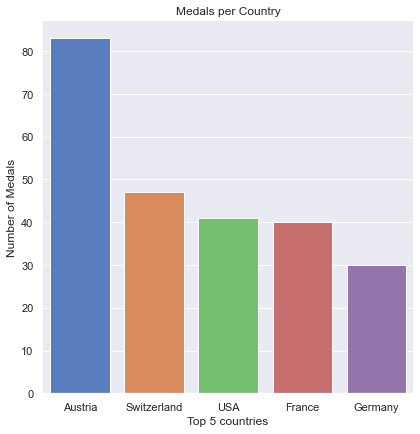

In [73]:
countryM = ASMEDAL.Country.value_counts().reset_index(name='Medal').head(5)
count = sb.catplot(x="index", y="Medal", data = countryM, 
                   height=6, kind="bar", palette="muted")
count.despine(left=True)
count.set_xlabels("Top 5 countries")
count.set_ylabels("Number of Medals")
plt.title('Medals per Country')

Text(0.5, 1.0, 'Male & Female Skiers over time')

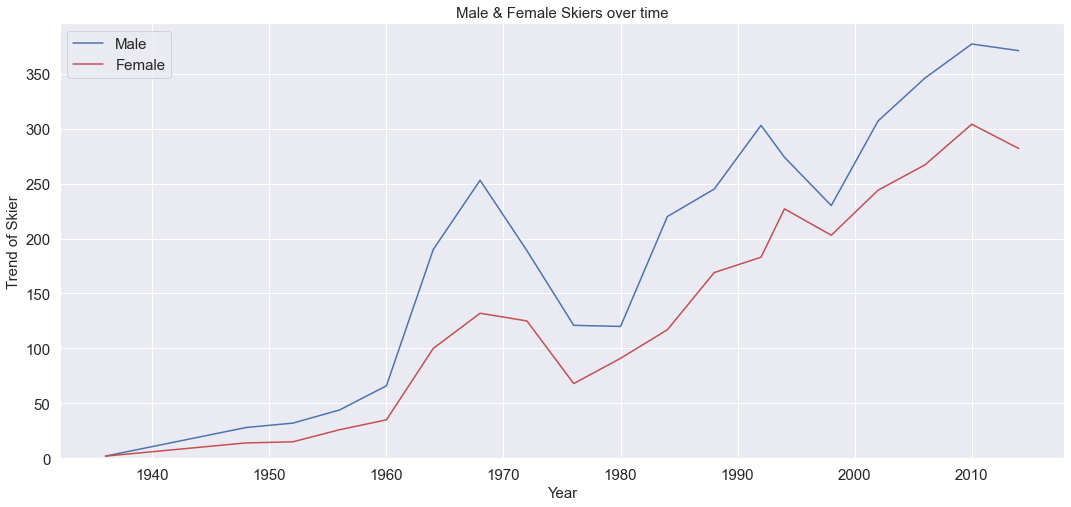

In [74]:
male = AS.loc[AS['Sex'] == 'M']
female = AS.loc[AS['Sex'] == 'F']
m = male.groupby('Year')['Sex'].value_counts()
f = female.groupby('Year')['Sex'].value_counts()

plt.figure(figsize = (18, 8))
plt.ylabel('Trend of Skier', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.tick_params(labelsize = 15)
plotm = m.loc[:,'M'].plot(color = "b").set_ylim(ymin=0)
plotf = f.loc[:,'F'].plot(color = "r").set_ylim(ymin=0)

plt.legend(['Male','Female'], loc = 'upper left', fontsize = 15)
plt.title('Male & Female Skiers over time', fontsize = 15)

In [75]:
YS = AS.groupby(['Year', 'Sex'])['ID'].agg('count').dropna()
df = pd.DataFrame(YS).reset_index()

male = df[df['Sex']=='M']
female = df[df['Sex']=='F']

fig = go.Figure(data=[
    go.Bar(name='Male', x=male['Year'], y=male['ID']),
    go.Bar(name='Female', x=female['Year'], y=female['ID'])
])
# Change the bar mode
fig.update_layout(
    title = 'Participants per Olympic edition',
    xaxis={'title':'Year', 'categoryorder':'category ascending',
           'type':'category'},
    yaxis = dict(title = 'Number of Athletes'),
    hovermode = 'closest', barmode='stack'
    )
fig.show()

D:\Program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, "Variation of Skier's Weight over time")

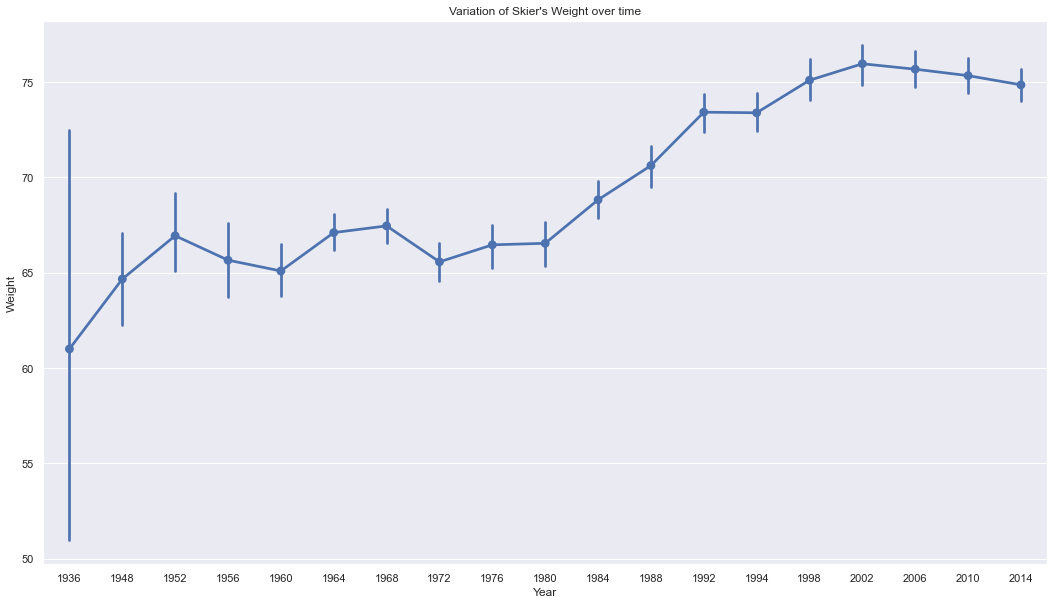

In [76]:
plt.figure(figsize=(18, 10))
sb.pointplot('Year', 'Weight', data = AS)
plt.title("Variation of Skier's Weight over time")


Text(0.5, 1.0, "Variation of Skier's Weight over time")

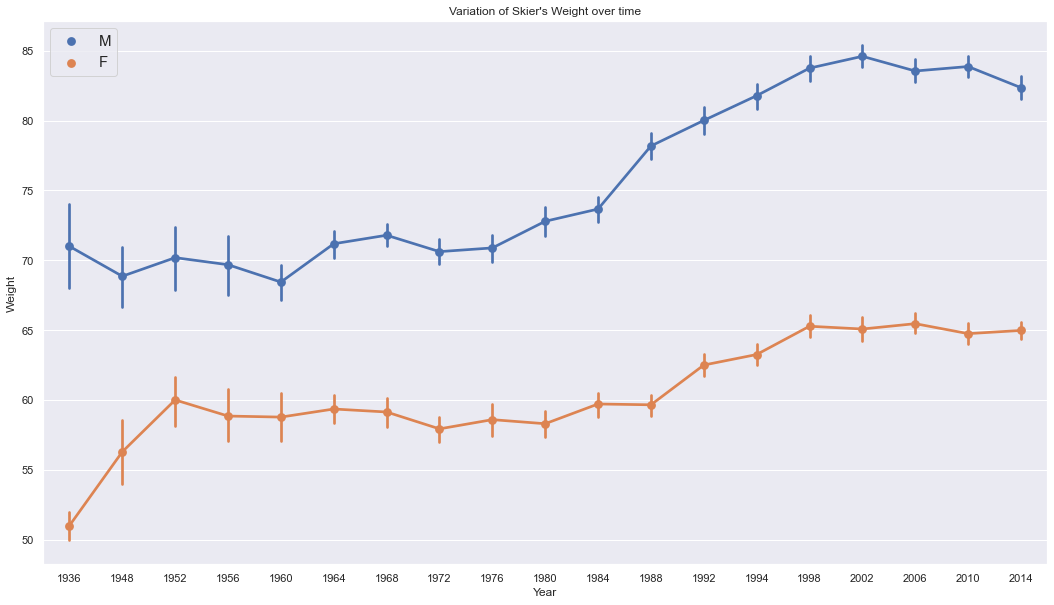

In [77]:
plt.figure(figsize=(18, 10))
sb.pointplot(x="Year", y="Weight", hue="Sex",
                   data=AS)
plt.legend(loc = 'upper left', fontsize = 15)
plt.title("Variation of Skier's Weight over time")

D:\Program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, "Variation of Skier's Height over time")

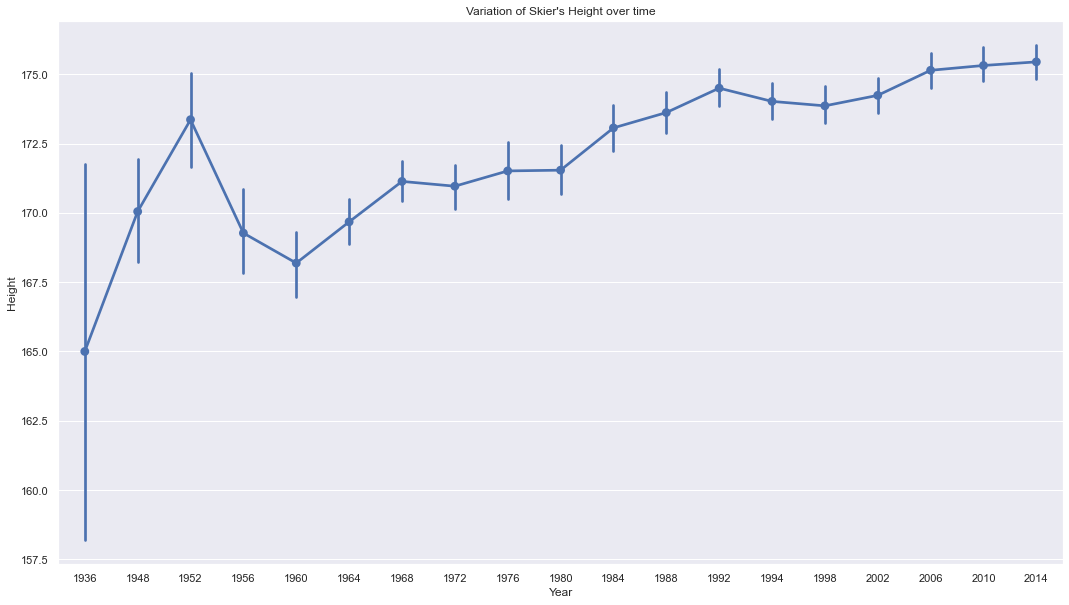

In [78]:
plt.figure(figsize=(18, 10))
sb.pointplot('Year', 'Height', data = AS)
plt.title("Variation of Skier's Height over time")


Text(0.5, 1.0, "Variation of Skier's Height over time")

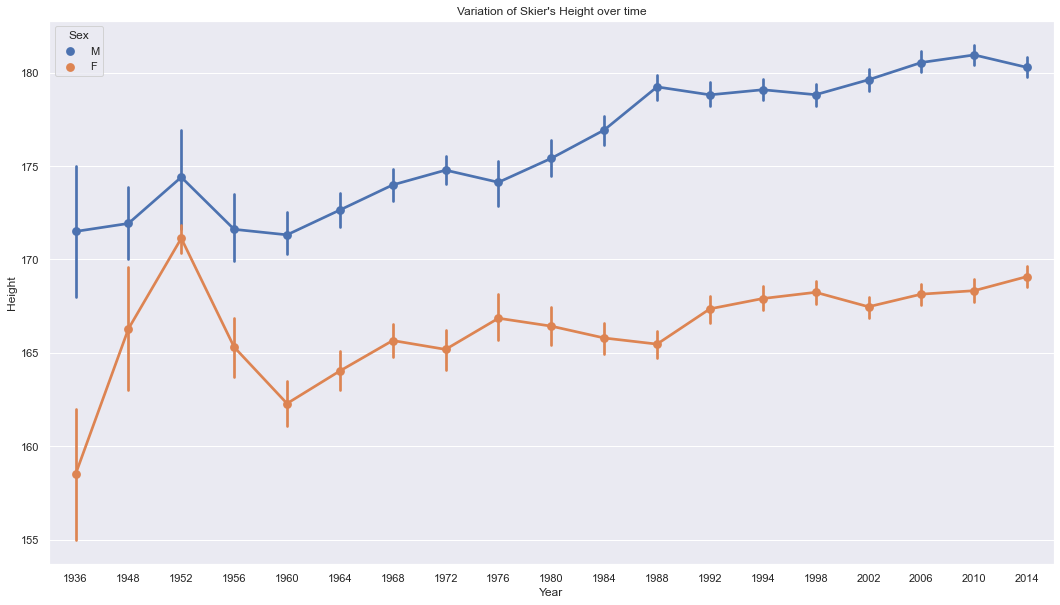

In [79]:
plt.figure(figsize=(18, 10))
sb.pointplot(x="Year", y="Height", hue="Sex",
                   data=AS)
plt.title("Variation of Skier's Height over time")

In [80]:
# Import train_test_split from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [81]:
AS['Sex'] = AS['Sex'].apply(lambda x: int(str(x).replace('F','1')) if 'F' in str(x) else x)
AS['Sex'] = AS['Sex'].apply(lambda x: int(str(x).replace('M','0')) if 'M' in str(x) else x)

In [82]:
# RecallDataset
Y = AS['Sex']  # Response
X = AS[['Weight','Height']]       # Predictor

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=10)

# Naive Bayes

In [83]:

gnb = GaussianNB()

model = gnb.fit(x_train, y_train)                 


y_train_pred = gnb.predict(x_train)
y_test_pred = gnb.predict(x_test)

print("Train Dataset")
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print()

print("Test Dataset")
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print()

Train Dataset
Accuracy: 0.8576230966976468

Test Dataset
Accuracy: 0.8679841897233201



# Decision Tree

In [84]:

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict M/F corresponding to Height/Weight
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8641487047656713

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8727272727272727



(2.0, -0.009)

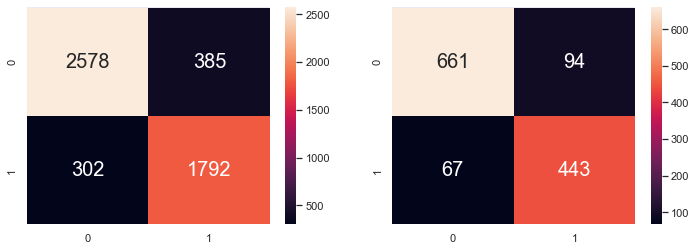

In [85]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[1])
axes[0].set_ylim(2, -.009)
axes[1].set_ylim(2, -.009)
#plt.ylim(2, -.009)

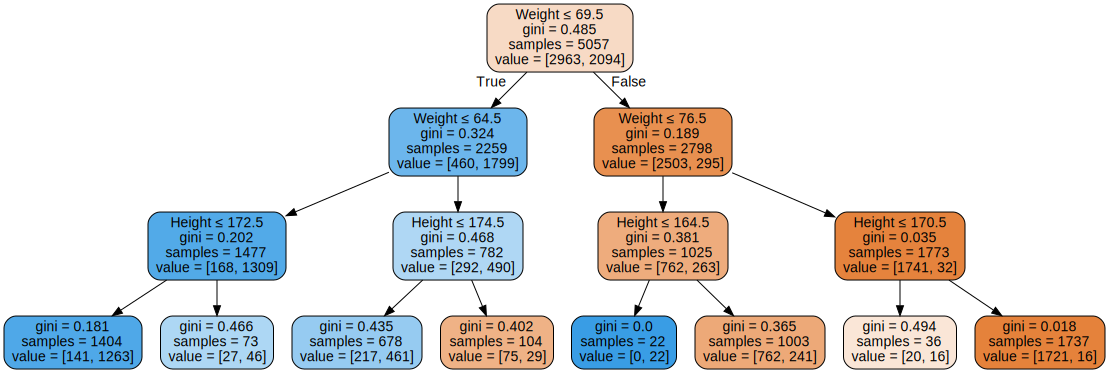

In [86]:
# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = x_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

# MEDALS CLASSIFICATION

In [87]:
ASMEDAL = AS[AS['Medal'] != 'Lose'] # only atheletes that win medals
ASMEDAL

ID                Name  Sex   Age  Height  Weight         Team  \
49          20  Kjetil Andr Aamodt    0  20.0   176.0    85.0       Norway   
50          20  Kjetil Andr Aamodt    0  20.0   176.0    85.0       Norway   
52          20  Kjetil Andr Aamodt    0  22.0   176.0    85.0       Norway   
53          20  Kjetil Andr Aamodt    0  22.0   176.0    85.0       Norway   
56          20  Kjetil Andr Aamodt    0  22.0   176.0    85.0       Norway   
...        ...                 ...  ...   ...     ...     ...          ...   
204019  134389      Kathrin Zettel    1  27.0   167.0    61.0      Austria   
205141  135021     Egon Zimmermann    0  24.0   180.0    80.0      Austria   
205974  135465   Pirmin Zurbriggen    0  25.0   183.0    83.0  Switzerland   
205976  135465   Pirmin Zurbriggen    0  25.0   183.0    83.0  Switzerland   
205982  135467   Silvan Zurbriggen    0  28.0   185.0    94.0  Switzerland   

        NOC        Games  Year  Season         City          Sport  \
49      NOR  1992 Winter  1992  Winter  Albertville  Alpine Skiing   
50      NOR  1992 Winter  1992  Winter  Albertville  Alpine Skiing   
52      NOR  1994 Winter  1994  Winter  Lillehammer  Alpine Skiing   
53      NOR  1994 Winter  1994  Winter  Lillehammer  Alpine Skiing   
56      NOR  1994 Winter  1994  Winter  Lillehammer  Alpine Skiing   
...     ...          ...   ...     ...          ...            ...   
204019  AUT  2014 Winter  2014  Winter        Sochi  Alpine Skiing   
205141  AUT  1964 Winter  1964  Winter    Innsbruck  Alpine Skiing   
205974  SUI  1988 Winter  1988  Winter      Calgary  Alpine Skiing   
205976  SUI  1988 Winter  1988  Winter      Calgary  Alpine Skiing   
205982  SUI  2010 Winter  2010  Winter    Vancouver  Alpine Skiing   

                                   Event   Medal      Country  
49           Alpine Skiing Men's Super G    Gold       Norway  
50      Alpine Skiing Men's Giant Slalom  Bronze       Norway  
52          Alpine Skiing Men's Downhill  Silver       Norway  
53           Alpine Skiing Men's Super G  Bronze       Norway  
56          Alpine Skiing Men's Combined  Silver       Norway  
...                                  ...     ...          ...  
204019      Alpine Skiing Women's Slalom  Bronze      Austria  
205141      Alpine Skiing Men's Downhill    Gold      Austria  
205974      Alpine Skiing Men's Downhill    Gold  Switzerland  
205976  Alpine Skiing Men's Giant Slalom  Bronze  Switzerland  
205982      Alpine Skiing Men's Combined  Bronze  Switzerland  

[354 rows x 16 columns]

In [88]:
ASMEDAL['Sex'] = ASMEDAL['Sex'].apply(lambda x: int(str(x).replace('F','1')) if 'F' in str(x) else x)
ASMEDAL['Sex'] = ASMEDAL['Sex'].apply(lambda x: int(str(x).replace('M','0')) if 'M' in str(x) else x)

In [89]:
# RecallDataset
Y = ASMEDAL['Sex']  # Response
X = ASMEDAL[['Weight','Height']]       # Predictor

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=10)

In [90]:
gnb = GaussianNB()

model = gnb.fit(x_train, y_train)                 


y_train_pred = gnb.predict(x_train)
y_test_pred = gnb.predict(x_test)

print("Train Dataset")
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print()

print("Test Dataset")
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print()

Train Dataset
Accuracy: 0.8692579505300353

Test Dataset
Accuracy: 0.8450704225352113



In [91]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict M/F corresponding to Height/Weight
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8975265017667845

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8591549295774648



(2.0, -0.009)

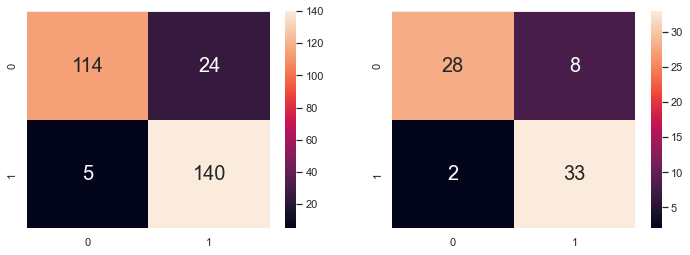

In [92]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[1])
axes[0].set_ylim(2, -.009)
axes[1].set_ylim(2, -.009)
#plt.ylim(2, -.009)

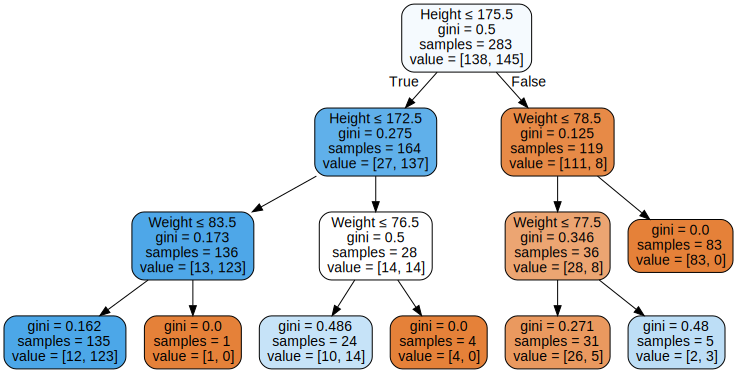

In [93]:
# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = x_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

## Random Forest Regressor

In [94]:
#Random Forest able to perform both classi & regression
#creates no. decision trees, more tree more robust
#Makes average predictions of all trees

# MEDAL WINNERS

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

y = pd.DataFrame(ASMEDAL[["Weight"]]) # Response
X = pd.DataFrame(ASMEDAL[["Height", "Age"]]) # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (283, 1) (283, 2)
Test Set  : (71, 1) (71, 2)


D:\Program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Program\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

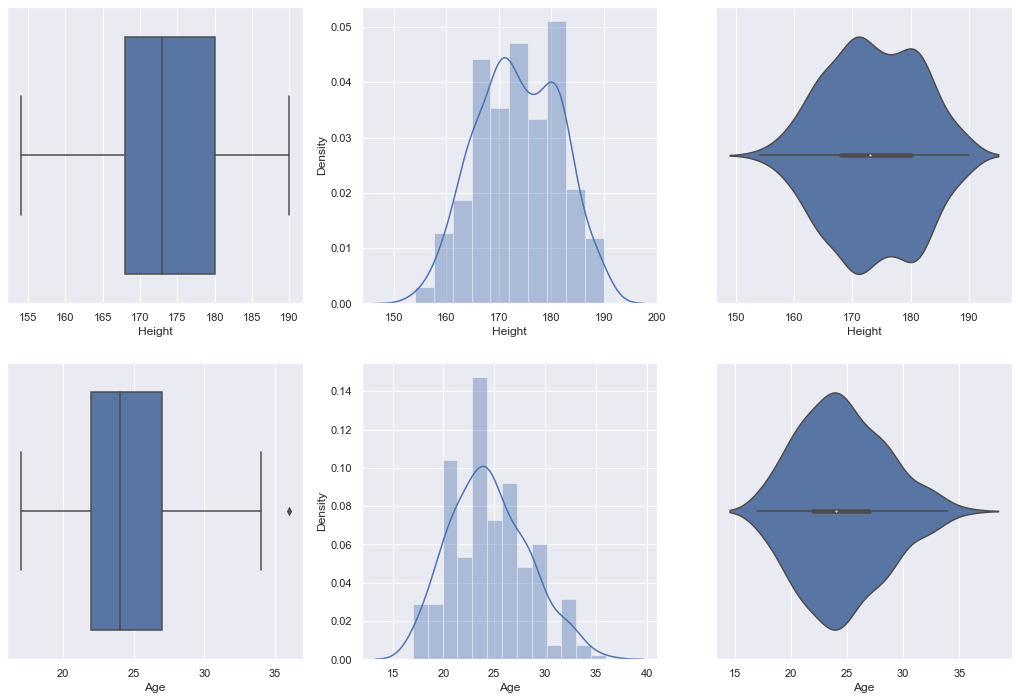

In [96]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(2, 3, figsize=(18, 12))

count = 0
for var in X_train:
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

In [97]:
n_estimators = 100
# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
model.fit(X_train, y_train)

C:\Users\Dizzy\AppData\Local\Temp/ipykernel_7584/1336588046.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(random_state=0)

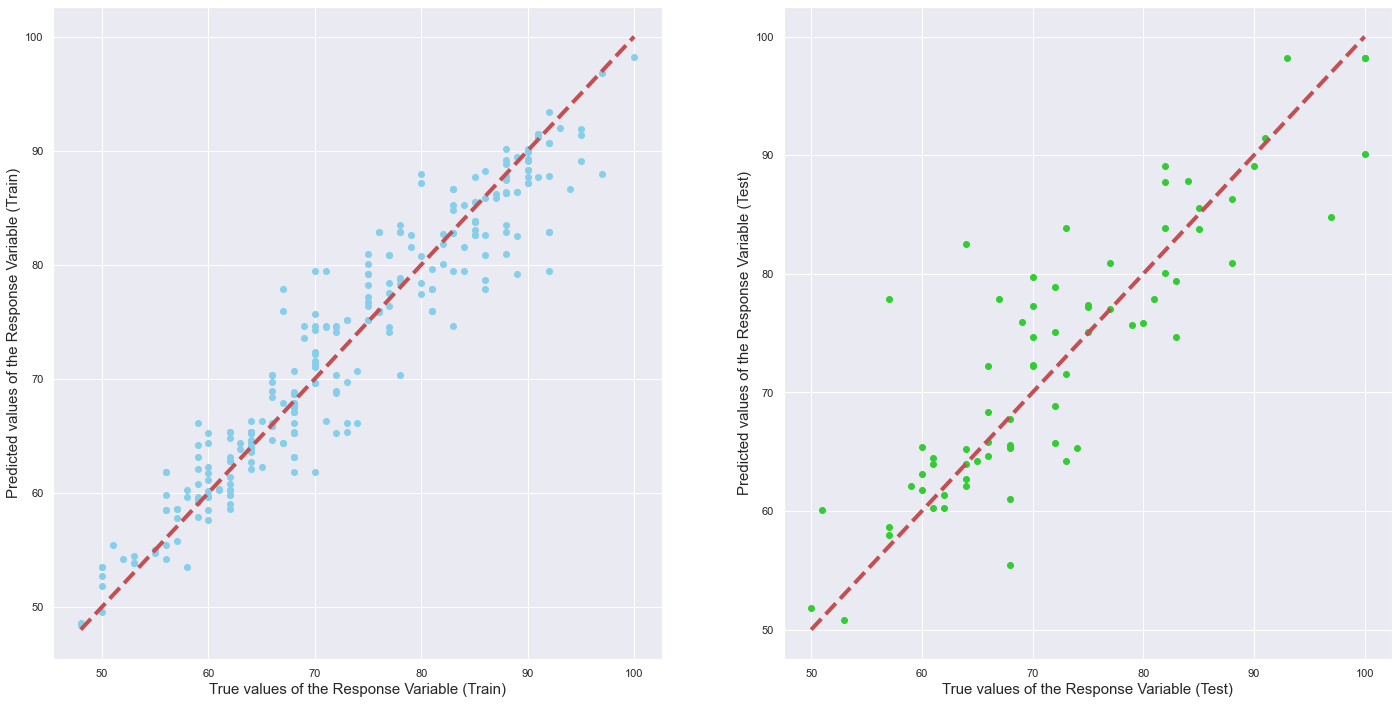

In [98]:
from sklearn.model_selection import cross_val_predict
model_score = model.score(X_train,y_train)
model_score2 = model.score(X_test,y_test)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "skyblue")
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
axes[0].set_xlabel("True values of the Response Variable (Train)", fontsize = 15)
axes[0].set_ylabel("Predicted values of the Response Variable (Train)", fontsize = 15)
axes[1].scatter(y_test, y_test_pred, color = "limegreen")
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
axes[1].set_xlabel("True values of the Response Variable (Test)", fontsize = 15)
axes[1].set_ylabel("Predicted values of the Response Variable (Test)", fontsize = 15)

plt.show()

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t: %.3f"% model_score)
print("Mean Squared Error (MSE) \t: %.3f"% mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t: %.3f"% model_score2)
print("Mean Squared Error (MSE) \t: %.3f"% mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.918
Mean Squared Error (MSE) 	: 12.002

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.741
Mean Squared Error (MSE) 	: 35.728



# NO MEDAL

In [100]:
ASLOSS = AS[AS['Medal'] == 'Lose'] # only atheletes that have no medals
ASLOSS

ID                Name  Sex   Age  Height  Weight     Team  NOC  \
48          20  Kjetil Andr Aamodt    0  20.0   176.0    85.0   Norway  NOR   
51          20  Kjetil Andr Aamodt    0  20.0   176.0    85.0   Norway  NOR   
54          20  Kjetil Andr Aamodt    0  22.0   176.0    85.0   Norway  NOR   
55          20  Kjetil Andr Aamodt    0  22.0   176.0    85.0   Norway  NOR   
57          20  Kjetil Andr Aamodt    0  26.0   176.0    85.0   Norway  NOR   
...        ...                 ...  ...   ...     ...     ...      ...  ...   
206032  135500  Kristaps Zvejnieks    0  17.0   185.0    87.0   Latvia  LAT   
206033  135500  Kristaps Zvejnieks    0  21.0   185.0    87.0   Latvia  LAT   
206034  135500  Kristaps Zvejnieks    0  21.0   185.0    87.0   Latvia  LAT   
206092  135540      David Zwilling    0  22.0   174.0    68.0  Austria  AUT   
206093  135540      David Zwilling    0  22.0   174.0    68.0  Austria  AUT   

              Games  Year  Season         City          Sport  \
48      1992 Winter  1992  Winter  Albertville  Alpine Skiing   
51      1992 Winter  1992  Winter  Albertville  Alpine Skiing   
54      1994 Winter  1994  Winter  Lillehammer  Alpine Skiing   
55      1994 Winter  1994  Winter  Lillehammer  Alpine Skiing   
57      1998 Winter  1998  Winter       Nagano  Alpine Skiing   
...             ...   ...     ...          ...            ...   
206032  2010 Winter  2010  Winter    Vancouver  Alpine Skiing   
206033  2014 Winter  2014  Winter        Sochi  Alpine Skiing   
206034  2014 Winter  2014  Winter        Sochi  Alpine Skiing   
206092  1972 Winter  1972  Winter      Sapporo  Alpine Skiing   
206093  1972 Winter  1972  Winter      Sapporo  Alpine Skiing   

                                   Event Medal  Country  
48          Alpine Skiing Men's Downhill  Lose   Norway  
51            Alpine Skiing Men's Slalom  Lose   Norway  
54      Alpine Skiing Men's Giant Slalom  Lose   Norway  
55            Alpine Skiing Men's Slalom  Lose   Norway  
57          Alpine Skiing Men's Downhill  Lose   Norway  
...                                  ...   ...      ...  
206032        Alpine Skiing Men's Slalom  Lose   Latvia  
206033  Alpine Skiing Men's Giant Slalom  Lose   Latvia  
206034        Alpine Skiing Men's Slalom  Lose   Latvia  
206092  Alpine Skiing Men's Giant Slalom  Lose  Austria  
206093        Alpine Skiing Men's Slalom  Lose  Austria  

[5968 rows x 16 columns]

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

y = pd.DataFrame(ASLOSS[["Weight"]]) # Response
X = pd.DataFrame(ASLOSS[["Height", "Age"]]) # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (4774, 1) (4774, 2)
Test Set  : (1194, 1) (1194, 2)


D:\Program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Program\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\Program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

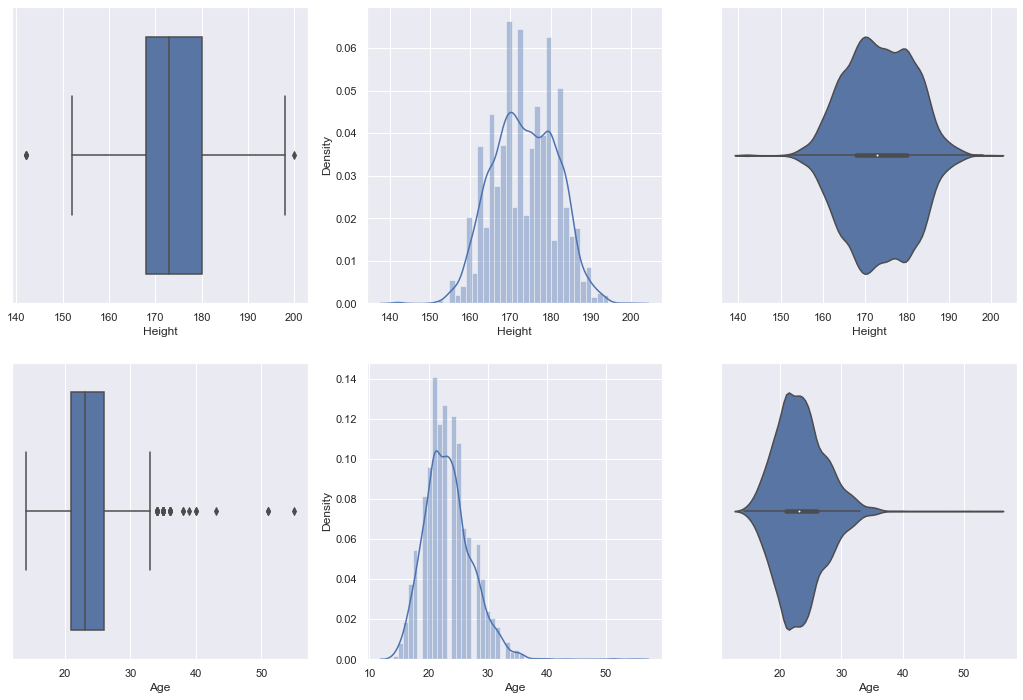

In [102]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(2, 3, figsize=(18, 12))

count = 0
for var in X_train:
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

In [104]:
n_estimators = 100
# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
model.fit(X_train, y_train)

C:\Users\Dizzy\AppData\Local\Temp/ipykernel_7584/1336588046.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(random_state=0)

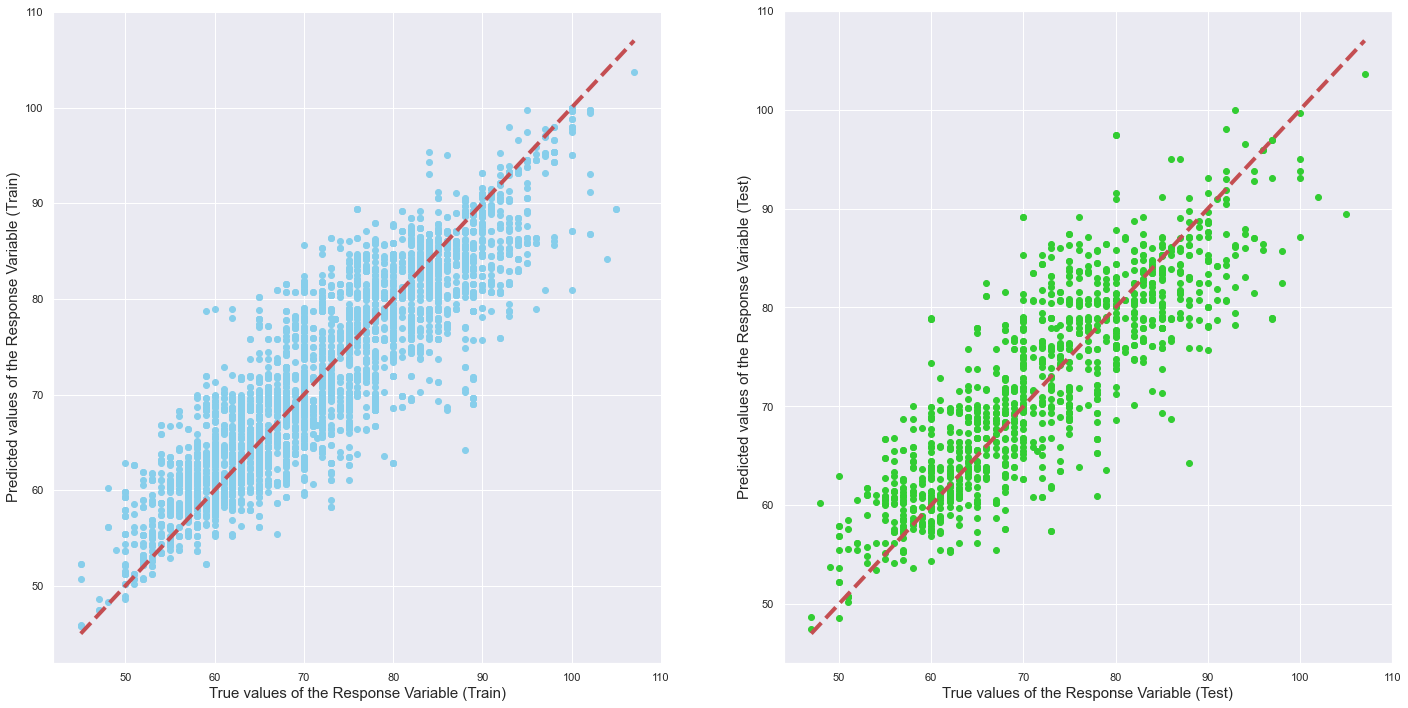

In [105]:
from sklearn.model_selection import cross_val_predict
model_score = model.score(X_train,y_train)
model_score2 = model.score(X_test,y_test)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "skyblue")
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
axes[0].set_xlabel("True values of the Response Variable (Train)", fontsize = 15)
axes[0].set_ylabel("Predicted values of the Response Variable (Train)", fontsize = 15)
axes[1].scatter(y_test, y_test_pred, color = "limegreen")
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
axes[1].set_xlabel("True values of the Response Variable (Test)", fontsize = 15)
axes[1].set_ylabel("Predicted values of the Response Variable (Test)", fontsize = 15)

plt.show()

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t: %.3f"% model_score)
print("Mean Squared Error (MSE) \t: %.3f"% mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t: %.3f"% model_score2)
print("Mean Squared Error (MSE) \t: %.3f"% mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.807
Mean Squared Error (MSE) 	: 24.596

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.720
Mean Squared Error (MSE) 	: 34.080

